<a href="https://colab.research.google.com/github/arumisoy/work/blob/main/Day3_work_rumikotanaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# 新しいセクション

In [2]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
#データの情報
df.shape
df.info()
#欠損値の集計
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [3]:
#使わない列,欠損値のある列、ドル換算の列を削除
df = df.drop(["ID","name","deadline","launched","backers","pledged","usd pledged","usd_pledged_real","usd_goal_real"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       378661 non-null  object 
 1   main_category  378661 non-null  object 
 2   currency       378661 non-null  object 
 3   goal           378661 non-null  float64
 4   state          378661 non-null  object 
 5   country        378661 non-null  object 
dtypes: float64(1), object(5)
memory usage: 17.3+ MB


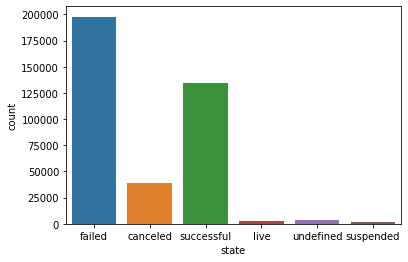

In [ ]:
#可視化
sns.countplot(data=df, x='state')

In [4]:
#successful=1 failed=0
df = df[(df["state"] == "successful") | (df["state"] == "failed")]

df["state"] = df["state"].replace("failed",0)
df["state"] = df["state"].replace("successful",1)

カラム名	意味
ID	KICKSTARTER上で管理するための番号
name	プロジェクト名
category	第2カテゴリー(下記main_categoryで分けられた分類をさらに細分化するためのカテゴリー)
main_category	第1カテゴリー
currency	募集した通貨の単位
deadline	支援金の公募期間の締切日
goal	目標公募金額
launched	支援金の公募期間の開始日
pledged	公募された金額
state	プロジェクトの資金調達が目標額に到達したかどうかの成功可否
backers	支援者数
country	どの国のプロジェクトか
usd pledged	KICKSTARTER運営側がドル換算した、公募された金額
usd_pledged_real	Fixer.io APIを利用してドル換算した、公募された金額
usd_goal_real	Fixer.io APIを利用してドル換算した、目標公募金額

In [5]:
#ダミー変数
df = pd.get_dummies(df,drop_first = True)

In [6]:
#モデルの作成
y = df["state"].values
X = df.drop("state", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
#ロジスティック回帰
clf = SGDClassifier(loss = "log", penalty = "none",random_state=1234)
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
#評価
clf.score(X_test, y_test)

0.5982513002185875

In [9]:
#Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv=5)

#正解率を出力する
print(f"スコア: {score}")

#平均値を出力する
print(f"平均値： {score.mean()}")

スコア: [0.61098967 0.59778398 0.59612573 0.60780885 0.59684933]
平均値： 0.6019115097610612
